<div style="background: url(https://i.postimg.cc/3N7wnb75/background.jpg)" class="jumbotron bg-cover text-white">
    <div class="container py-5 text-center">
        <h1 class="display-4 font-weight-bold"; style="color:aqua">TASK 3 BY THE SPARKS FOUNDATION</h1>
        <p class="font-italic mb-0"; style="color:white">Exploratory Data Analysis - Retail </p>
        <p class="font-italic mb-0"; style="color:white">Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’</p>
        <p class="font-italic mb-0"; style="color:white">As a business manager, try to find out the weak areas where you can work to make more profit. </p>
        <p class="font-italic mb-0"; style="color:white">What all business problems you can derive by exploring the data?  </p>
    </div>
</div>


# <font face='MV Boli'><font color=green><b> Importing and Cleaning Data

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [11]:
data = pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [12]:
data.shape

(9994, 13)

In [13]:
data.isna().sum().to_frame('Null Values')

,Null Values
Ship Mode,0
Segment,0
Country,0
City,0
State,0
Postal Code,0
Region,0
Category,0
Sub-Category,0
Sales,0


In [14]:
data.duplicated().sum()

17

In [15]:
data = data.drop_duplicates()
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [16]:
data.Country.unique()

array(['United States'], dtype=object)

In [17]:
data = data.drop(columns=['Postal Code', 'Country'], axis=1)
data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [18]:
data.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


# <font face='MV Boli'><font color=green><b>DATA EXPLORATION

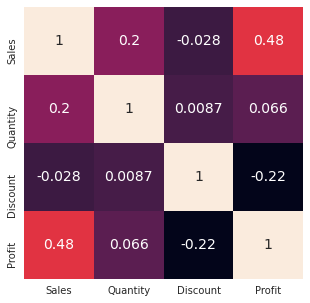

In [19]:
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(), annot=True, cbar=False, annot_kws={'size':14})
plt.show()

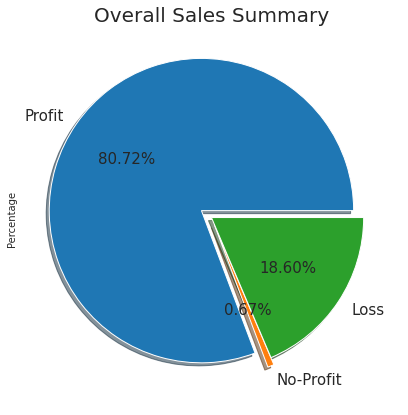

In [20]:
summary = pd.DataFrame({'Profit':data.Quantity[data.Profit > 0].sum(), 
                        'No-Profit':data.Quantity[data.Profit == 0].sum(), 
                        'Loss':data.Quantity[(data.Profit) < 0].sum()},
                       index={'Count'}).T
plt.title('Overall Sales Summary', fontsize=20)
summary.Count.plot.pie(autopct='%1.2f%%',figsize=(7,7), label='Percentage', 
                       textprops = {"fontsize":15}, shadow=True, explode=(0.08,0.05,0))
plt.show()

## <font face='MV Boli'><font color=green><b> Overall Profit Analysis

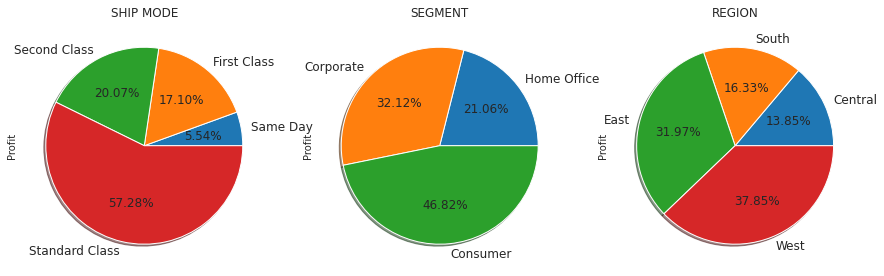

In [21]:
prof_S = pd.DataFrame(data.groupby('Ship Mode').sum()).sort_values('Profit')
prof_G = pd.DataFrame(data.groupby('Segment').sum()).sort_values('Profit')
prof_R = pd.DataFrame(data.groupby('Region').sum()).sort_values('Profit')
fig, ax = plt.subplots(1,3, figsize=(15,6))
ax[0].set_title('SHIP MODE', fontsize=12)
ax[1].set_title('SEGMENT', fontsize=12)
ax[2].set_title('REGION', fontsize=12)
prof_S.Profit.plot.pie(autopct='%1.2f%%', textprops = {"fontsize":12}, shadow=True, ax=ax[0])
prof_G.Profit.plot.pie(autopct='%1.2f%%', textprops = {"fontsize":12}, shadow=True, ax=ax[1])
prof_R.Profit.plot.pie(autopct='%1.2f%%', textprops = {"fontsize":12}, shadow=True, ax=ax[2])
plt.show()

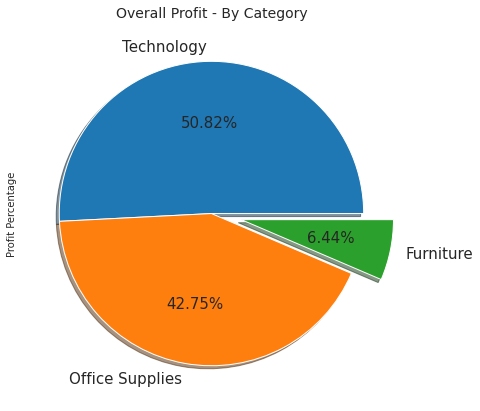

In [22]:
cat = np.round(data.groupby('Category').sum(), decimals=2).sort_values('Profit', ascending=False)
plt.title('Overall Profit - By Category', fontsize=14)
cat.Profit.plot.pie(autopct='%1.2f%%', figsize=(7,7), label='Profit Percentage', 
                    textprops = {"fontsize":15}, explode=(0, 0, 0.2), shadow=True)
plt.show()

Total items Sold: 37820


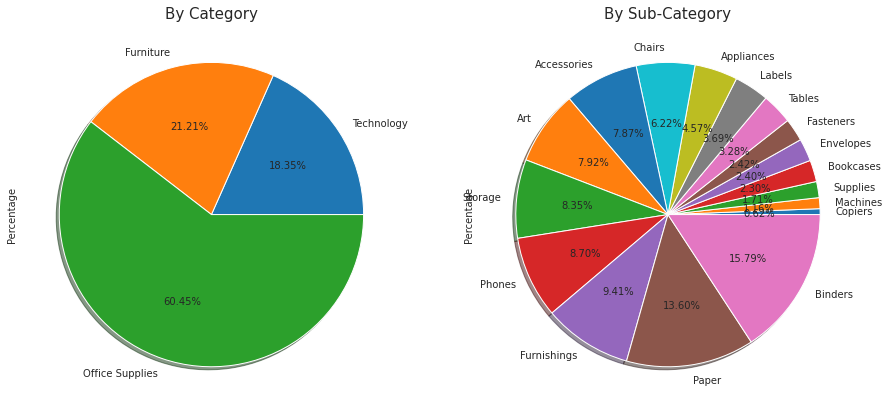

In [23]:
cat = data.groupby('Category').sum().iloc[:,1].sort_values().to_frame('Count')
sub = data.groupby('Sub-Category').sum().iloc[:,1].sort_values().to_frame('Count')
print(f'Total items Sold: {data.Quantity.sum()}')
fig, ax = plt.subplots(1,2, figsize=(15,10))
ax[0].set_title('By Category', fontsize=15)
ax[1].set_title('By Sub-Category', fontsize=15)
cat.Count.plot.pie(autopct='%1.2f%%', label='Percentage', radius=1, shadow=True, ax=ax[0])
sub.Count.plot.pie(autopct='%1.2f%%', label='Percentage', radius=1, shadow=True, ax=ax[1])
plt.show()

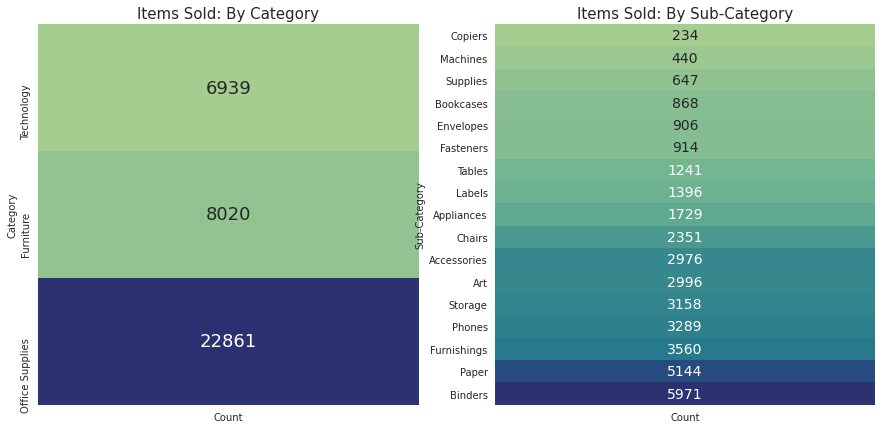

In [24]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].set_title('Items Sold: By Category', fontsize=15)
ax[1].set_title('Items Sold: By Sub-Category', fontsize=15)
sns.heatmap(cat, ax=ax[0], cbar=False, annot=True, cmap='crest', fmt='2', annot_kws={'size':18})
sns.heatmap(sub, ax=ax[1], annot=True, cbar=False, cmap='crest', fmt='2', annot_kws={'size':14})
plt.show()
plt.show()

Category-wise Summary


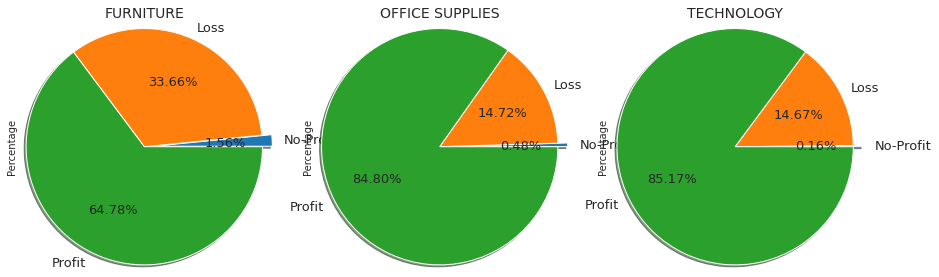

In [25]:
summ_offc = pd.DataFrame({'Profit':data[(data.Category == 'Office Supplies') 
                                        & (data.Profit > 0)].count()[0], 
                        'No-Profit':data[(data.Category == 'Office Supplies') 
                                         & (data.Profit == 0)].count()[0], 
                        'Loss':data[(data.Category == 'Office Supplies') 
                                    & (data.Profit < 0)].count()[0]},
                       index={'Percentage'}).T.sort_values('Percentage')
summ_furn = pd.DataFrame({'Profit':data[(data.Category == 'Furniture') 
                                        & (data.Profit > 0)].count()[0], 
                        'No-Profit':data[(data.Category == 'Furniture') 
                                         & (data.Profit == 0)].count()[0], 
                        'Loss':data[(data.Category == 'Furniture') 
                                    & (data.Profit < 0)].count()[0]},
                       index={'Percentage'}).T.sort_values('Percentage')
summ_tech = pd.DataFrame({'Profit':data[(data.Category == 'Technology') 
                                        & (data.Profit > 0)].count()[0], 
                        'No-Profit':data[(data.Category == 'Technology') 
                                         & (data.Profit == 0)].count()[0], 
                        'Loss':data[(data.Category == 'Technology') 
                                    & (data.Profit < 0)].count()[0]},
                       index={'Percentage'}).T.sort_values('Percentage')
fig, ax = plt.subplots(1,3, figsize=(15,5))
print('Category-wise Summary')
ax[0].set_title('FURNITURE', fontsize=14)
ax[1].set_title('OFFICE SUPPLIES', fontsize=14)
ax[2].set_title('TECHNOLOGY', fontsize=14)
summ_furn.Percentage.plot.pie(autopct='%1.2f%%', radius= 1.2, explode=(0.1, 0, 0), 
                              textprops = {"fontsize":13}, shadow=True, ax=ax[0])
summ_offc.Percentage.plot.pie(autopct='%1.2f%%', radius= 1.2, explode=(0.1, 0, 0), 
                              textprops = {"fontsize":13}, shadow=True, ax=ax[1])
summ_tech.Percentage.plot.pie(autopct='%1.2f%%', radius= 1.2, explode=(0.1, 0, 0), 
                              textprops = {"fontsize":13}, shadow=True, ax=ax[2])
plt.show()

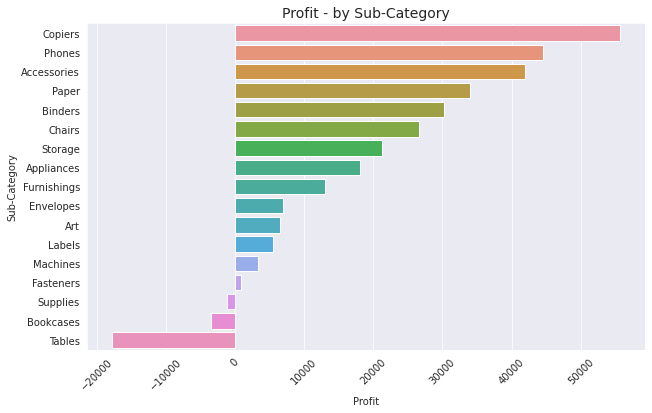

In [26]:
# Sales Summary by Sub-Category
sub = np.round(data.groupby('Sub-Category').sum(), decimals=2).sort_values('Profit', ascending=False)
plt.figure(figsize=(10,6))
plt.title('Profit - by Sub-Category', fontsize=14)
sns.barplot(sub.Profit, sub.index)
plt.xticks(rotation=45)
plt.show()

## <font face='MV Boli'><font color=green><b> State-wise Analysis

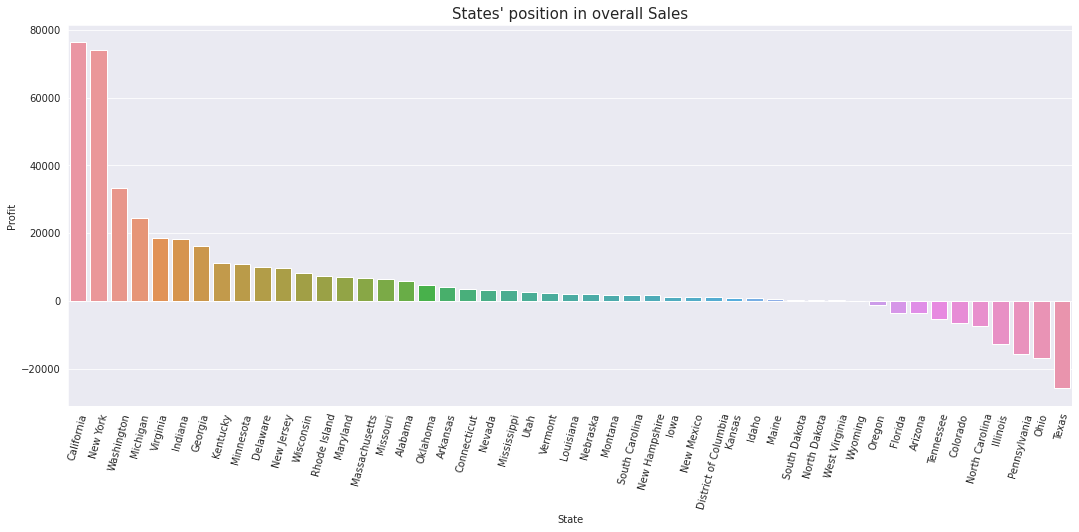

In [27]:
state_P = pd.DataFrame(data.groupby('State').sum()).sort_values('Profit', ascending=False)
plt.figure(figsize=(18,7))
plt.title("States' position in overall Sales", fontsize=15)
sns.barplot(state_P.index, state_P.Profit)
plt.xticks(rotation=75)
plt.show()

# <font face='MV Boli'><font color=green><b> Region-wise Analysis

REGION-WISE SALES SUMMARY


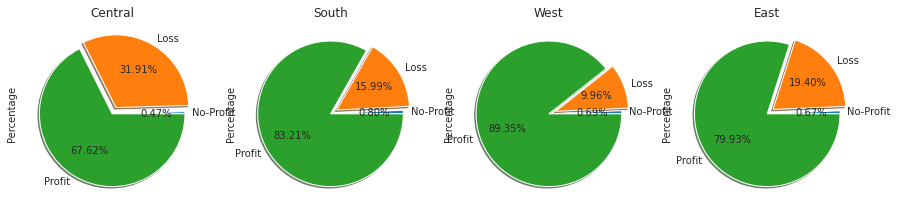

In [28]:
summ_cent = pd.DataFrame({'Profit':data[(data.Region == 'Central') 
                                        & (data.Profit > 0)].count()[0], 
                        'No-Profit':data[(data.Region == 'Central') 
                                         & (data.Profit == 0)].count()[0], 
                        'Loss':data[(data.Region == 'Central') 
                                    & (-data.Profit > 0)].count()[0]},
                       index={'Percentage'}).T.sort_values('Percentage')
summ_sou = pd.DataFrame({'Profit':data[(data.Region == 'South') 
                                        & (data.Profit > 0)].count()[0], 
                        'No-Profit':data[(data.Region == 'South') 
                                         & (data.Profit == 0)].count()[0], 
                        'Loss':data[(data.Region == 'South') 
                                    & (-data.Profit > 0)].count()[0]},
                       index={'Percentage'}).T.sort_values('Percentage')
summ_west = pd.DataFrame({'Profit':data[(data.Region == 'West') 
                                        & (data.Profit > 0)].count()[0], 
                        'No-Profit':data[(data.Region == 'West') 
                                         & (data.Profit == 0)].count()[0], 
                        'Loss':data[(data.Region == 'West') 
                                    & (-data.Profit > 0)].count()[0]},
                       index={'Percentage'}).T.sort_values('Percentage')
summ_east = pd.DataFrame({'Profit':data[(data.Region == 'East') 
                                        & (data.Profit > 0)].count()[0], 
                        'No-Profit':data[(data.Region == 'East') 
                                         & (data.Profit == 0)].count()[0], 
                        'Loss':data[(data.Region == 'East') 
                                    & (-data.Profit > 0)].count()[0]},
                       index={'Percentage'}).T.sort_values('Percentage')
fig, ax = plt.subplots(1,4, figsize=(15,5))
print('REGION-WISE SALES SUMMARY')
ax[0].set_title('Central')
ax[1].set_title('South')
ax[2].set_title('West')
ax[3].set_title('East')
summ_cent.Percentage.plot.pie(autopct='%1.2f%%', ax=ax[0], explode=(0,0.1,0), shadow=True)
summ_sou.Percentage.plot.pie(autopct='%1.2f%%', ax=ax[1], explode=(0,0.1,0), shadow=True)
summ_west.Percentage.plot.pie(autopct='%1.2f%%', ax=ax[2], explode=(0,0.1,0), shadow=True)
summ_east.Percentage.plot.pie(autopct='%1.2f%%', ax=ax[3], explode=(0,0.1,0), shadow=True)
plt.show()

In [29]:
loss = np.round(data[-(data.Profit) > 0], decimals=2).sort_values('Profit')

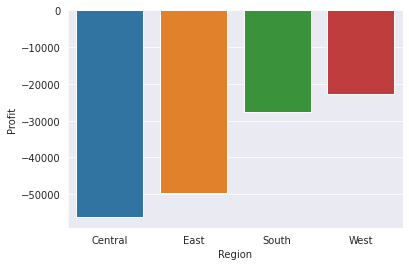

In [30]:
reg_loss = loss.groupby('Region').sum()
sns.barplot(reg_loss.index, reg_loss.Profit)
plt.show()

In [31]:
print(f'States with Sales Loss in each Region\n{"-"*37}')
print(f'Central\t:{loss[loss.Region == "Central"].State.unique().tolist()}')
print(f'South\t:{loss[loss.Region == "South"].State.unique().tolist()}')
print(f'West\t:{loss[loss.Region == "West"].State.unique().tolist()}')
print(f'East\t:{loss[loss.Region == "East"].State.unique().tolist()}')

States with Sales Loss in each Region
-------------------------------------
Central	:['Texas', 'Illinois']
South	:['North Carolina', 'Florida', 'Tennessee']
West	:['Colorado', 'Arizona', 'Oregon', 'California', 'Nevada', 'Washington', 'New Mexico']
East	:['Ohio', 'Pennsylvania', 'New York', 'Massachusetts', 'Rhode Island', 'New Hampshire', 'West Virginia', 'Delaware', 'Maryland', 'New Jersey', 'Connecticut']


## <font face='MV Boli'><font color=green><b>Sales Analysis - FURNITURE

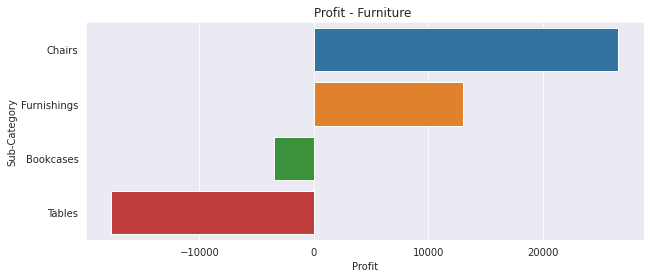

In [32]:
furn = data[data.Category == 'Furniture'].groupby('Sub-Category').sum().sort_values('Profit', ascending=False).iloc[:, [-1]]
plt.figure(figsize=(10,4))
plt.title('Profit - Furniture ')
sns.barplot( furn.Profit, furn.index,)
plt.show()

### Chairs & Furnishings 

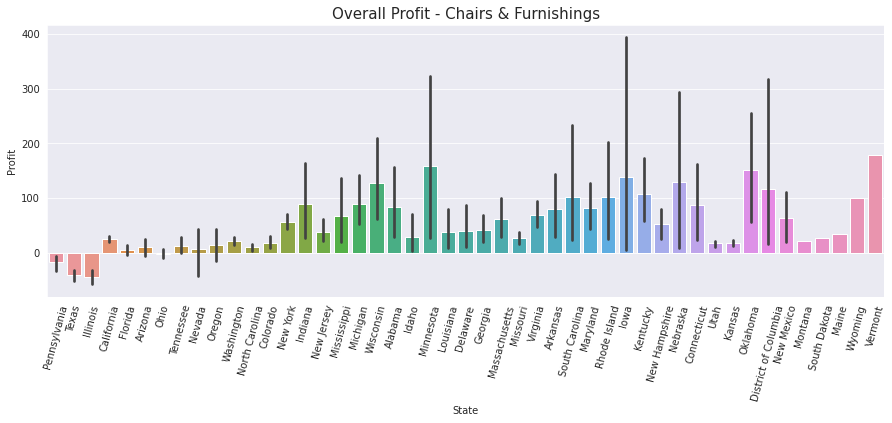

In [33]:
fc = data[(data['Sub-Category'] == 'Chairs') | (data['Sub-Category'] == 'Furnishings')].sort_values('Profit')
plt.figure(figsize=(15,5))
plt.title('Overall Profit - Chairs & Furnishings', fontsize=15)
sns.barplot(fc['State'], fc.Profit)
plt.xticks(rotation=75)
plt.show()

### <font face='MV Boli'><font color=green><b>Tables & Bookcases

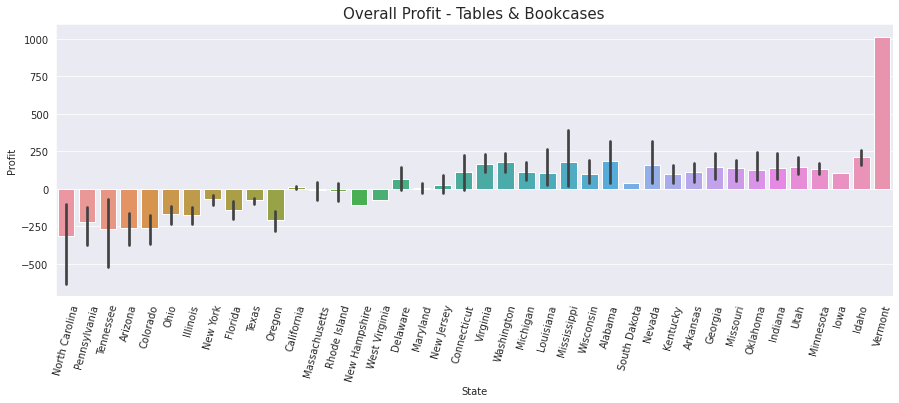

In [34]:
tb = data[(data['Sub-Category'] == 'Bookcases') | (data['Sub-Category'] == 'Tables')].sort_values('Profit')
plt.figure(figsize=(15,5))
plt.title('Overall Profit - Tables & Bookcases', fontsize=15)
sns.barplot(tb['State'], tb.Profit)
plt.xticks(rotation=75)
plt.show()

## <font face='MV Boli'><font color=green><b>Texas-Illinois Sales Analysis

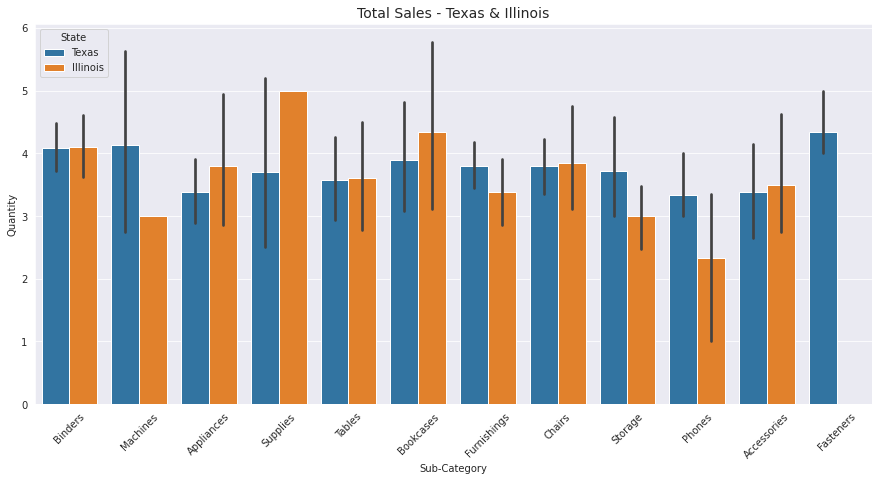

In [35]:
central = loss[loss.Region == 'Central']
plt.figure(figsize=(15,7))
plt.title('Total Sales - Texas & Illinois', fontsize=14)
sns.barplot(central['Sub-Category'], central['Quantity'], hue=central['State'])
plt.xticks(rotation=45)
plt.show()

In [36]:
tex_ill = data[(data.State == 'Texas') | (data.State == 'Illinois')].iloc[:, [2,3,5,6,-2,-1]].sort_values('State')

TEXAS & ILLINOIS - Sales Analysis by Category


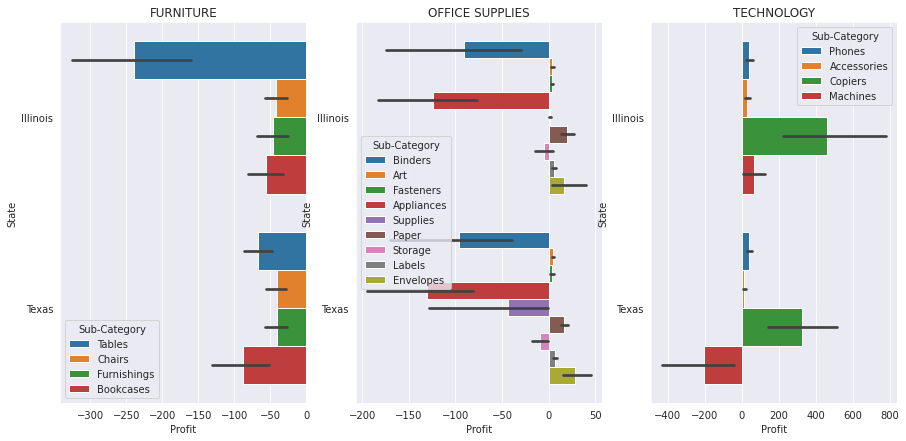

In [37]:
tex_f = tex_ill[tex_ill.Category == 'Furniture']
tex_o = tex_ill[tex_ill.Category == 'Office Supplies']
tex_t = tex_ill[tex_ill.Category == 'Technology']
print('TEXAS & ILLINOIS - Sales Analysis by Category')
fig, ax = plt.subplots(1,3, figsize=(15,7))
ax[0].set_title('FURNITURE', fontsize=12)
ax[1].set_title('OFFICE SUPPLIES', fontsize=12)
ax[2].set_title('TECHNOLOGY', fontsize=12)
sns.barplot(tex_f.Profit, tex_f.State, hue=tex_f['Sub-Category'], ax=ax[0])
sns.barplot(tex_o.Profit, tex_o.State, hue=tex_o['Sub-Category'], ax=ax[1])
sns.barplot(tex_t.Profit, tex_t.State, hue=tex_t['Sub-Category'], ax=ax[2])
plt.show()

In [38]:
texas_profit = tex_ill.Profit.sum()
texas_loss = tex_ill.Profit[-tex_ill.Profit > 0].sum()
print(f'Sales Profit of Texas & Illinois: {np.round(texas_profit, decimals=2)}')
print(f'Profit if avoided items that cause loss: {np.round(texas_profit - texas_loss, decimals=2)}')

Sales Profit of Texas & Illinois: -38352.63
Profit if avoided items that cause loss: 17956.01


## <font face='MV Boli'><font color=green><b>Quantity, Discount & Profit

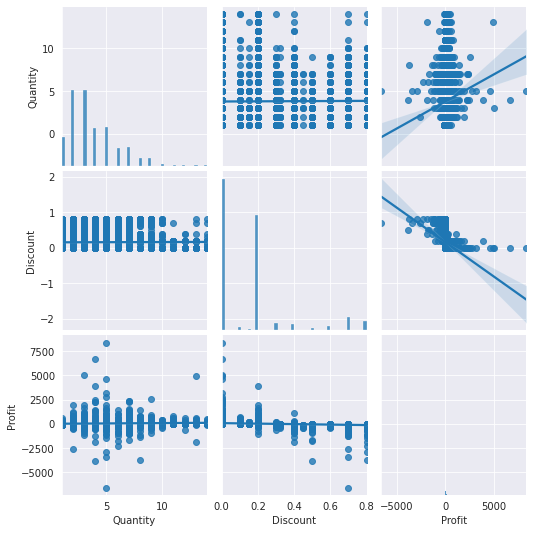

In [39]:
sns.pairplot(data=data.iloc[:,-3:], kind='reg')
plt.show()

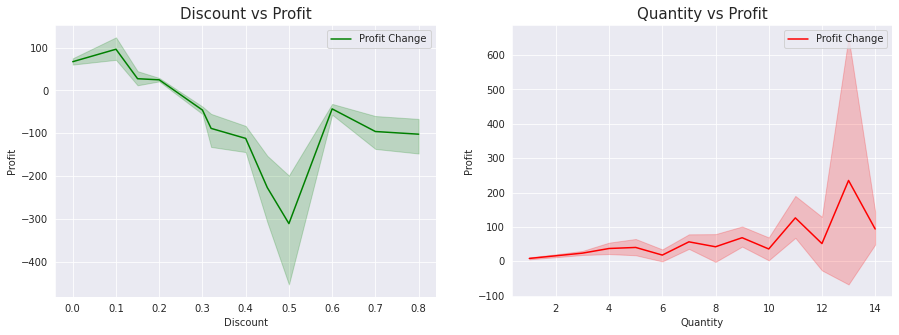

In [40]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].set_title('Discount vs Profit', fontsize=15)
ax[1].set_title('Quantity vs Profit', fontsize=15)
sns.lineplot(data.Discount, data.Profit, color='green', label='Profit Change', ax=ax[0])
sns.lineplot(data.Quantity, data.Profit, color='red', label='Profit Change', ax=ax[1])
plt.show()

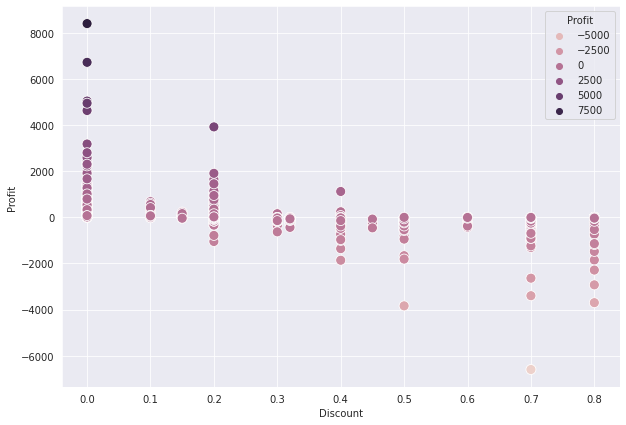

In [41]:
plt.figure(figsize=(10,7))
sns.scatterplot(data.Discount, data.Profit, hue=data.Profit, s=100)
plt.show()

### Analytics:
<b>

* The profit is in a good range when the discount is minimal, and there is no discount.

* When discount increases, Sales Loss is increasing and vice versa.

* Central region facing more loss in sales compared with others.

* Texas & Illinois are the States where overall sales are in loss and particularly for furniture.

* Supply of Furniture results in high loss - especially Tables & Bookcases.

* Texas & Illinois have a loss in some of the Office-Supplies - Binders, Appliances & Storage(& Supplies in Texas).

* States except Pennsylvania, Texas & Illinois has profit in sales of Chairs & Furnishings.

## Conclusion

* The product must sell with low/no discount to become the best profitable.

* Better minimize supplying Furniture(Tables & Bookcases) and the items in other categories that result in loss.

* Texas & Illinois must drop the supply of furniture,  items in Technology will enhance their profit (especially Copiers).<\b>

<div style="background: url(https://i.postimg.cc/3N7wnb75/background.jpg)" class="jumbotron bg-cover text-white">
    <div class="container py-5 text-center">
        <h1 class="display-4 font-weight-bold"; style="color:aqua"><center>Thank You</h1>
    </div>
</div>